In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("hepatitis_eda.csv")

In [3]:
# delete EU from country 
df = df[~df['Country'].str.contains('EU', na=False)]
df

,Unnamed: 0,Country,Time,Gender,Category_age,Chronic_percentage,Acute_percentage
0,0,Austria,2008,Female,0-4,0.00,0.00
1,1,Austria,2008,Female,15-19,0.00,10.92
2,2,Austria,2008,Female,20-24,0.00,2.08
3,3,Austria,2008,Female,25-34,0.00,11.96
4,4,Austria,2008,Female,35-44,0.00,7.28
...,...,...,...,...,...,...,...
9499,9499,United Kingdom,2019,Male,35-44,1.53,11.59
9500,9500,United Kingdom,2019,Male,45-54,0.90,12.20
9501,9501,United Kingdom,2019,Male,5-14,0.00,0.00
9502,9502,United Kingdom,2019,Male,55-64,0.45,9.15


In [4]:
# imputing the missing values of chronic percentage for France

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['Chronic_percentage'] = imputer.fit_transform(df[['Chronic_percentage']])


In [5]:
# Encoding categorical variables 

label_encoder_country = LabelEncoder()
df['Country'] = label_encoder_country.fit_transform(df['Country'])
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
label_encoder_age = LabelEncoder()
df['Category_age'] = label_encoder_age.fit_transform(df['Category_age'])

# Verify
df.head()



,Unnamed: 0,Country,Time,Gender,Category_age,Chronic_percentage,Acute_percentage
0,0,0,2008,0,0,0.0,0.00
1,1,0,2008,0,1,0.0,10.92
2,2,0,2008,0,2,0.0,2.08
3,3,0,2008,0,3,0.0,11.96
4,4,0,2008,0,4,0.0,7.28


In [6]:
print(df.isnull().sum())

df = df.dropna()  


Unnamed: 0            0
Country               0
Time                  0
Gender                0
Category_age          0
Chronic_percentage    0
Acute_percentage      0
dtype: int64


In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
# Select features and targets
X = df[['Country', 'Time', 'Gender', 'Category_age']]
y_chronic = df['Chronic_percentage']  
y_acute = df['Acute_percentage']  



In [9]:
# separate train-test
X_train, X_test, y_train_chronic, y_test_chronic = train_test_split(X, y_chronic, test_size=0.2, random_state=42)
X_train, X_test, y_train_acute, y_test_acute = train_test_split(X, y_acute, test_size=0.2, random_state=42)

In [10]:
# Create and train Random Forest model for Chronic_percentage
rf_chronic = RandomForestRegressor(n_estimators=100, random_state=42)
rf_chronic.fit(X_train, y_train_chronic)

# Create and train Random Forest model for Acute_percentage
rf_acute = RandomForestRegressor(n_estimators=100, random_state=42)
rf_acute.fit(X_train, y_train_acute)

RandomForestRegressor(random_state=42)

In [11]:
# Predict test data
chronic_preds = rf_chronic.predict(X_test)
acute_preds = rf_acute.predict(X_test)

In [12]:
import numpy as np

# Calculate root mean squared error (RMSE)
rmse_chronic = np.sqrt(mean_squared_error(y_test_chronic, chronic_preds))
rmse_acute = np.sqrt(mean_squared_error(y_test_acute, acute_preds))

print(f'RMSE for Chronic_percentage: {rmse_chronic}')
print(f'RMSE for Acute_percentage: {rmse_acute}')

RMSE for Chronic_percentage: 0.30115765037159015
RMSE for Acute_percentage: 4.646412202336281


#### RMSE (root mean squared error) measures the accuracy of a model's predictions. It calculates the average difference between the predicted values and the actual values, giving more weight to larger errors due to the squaring. Lower RMSE values indicate better model performance. 

In [13]:
# Predict new data (ex. Austria)
X_new = pd.DataFrame({
    'Country': [label_encoder_country.transform(['Austria'])[0]],  
    'Time': [2020],  
    'Gender': [label_encoder_gender.transform(['Female'])[0]],  
    'Category_age': [label_encoder_age.transform(['35-44'])[0]] 
})


In [14]:
# Predict new datas
chronic_new_prediction = rf_chronic.predict(X_new)
acute_new_prediction = rf_acute.predict(X_new)

print(f'Predizione Chronic_percentage for Austria, female, 35-44 yo, 2020: {chronic_new_prediction[0]}')
print(f'Predizione Acute_percentage for Austria, female, 35-44 yo, 2020: {acute_new_prediction[0]}')

Predizione Chronic_percentage for Austria, female, 35-44 yo, 2020: 0.21150000000000044
Predizione Acute_percentage for Austria, female, 35-44 yo, 2020: 7.298200000000008


In [15]:
# Predict test data
y_pred_chronic = rf_chronic.predict(X_test)
y_pred_acute = rf_acute.predict(X_test)

# Calculate R^2 score
from sklearn.metrics import r2_score

# (R^2)
r2_chronic = r2_score(y_test_chronic, y_pred_chronic)
r2_acute = r2_score(y_test_acute, y_pred_acute)

# 
print(f"R^2 for Chronic: {r2_chronic}")
print(f"R^2 for Acute: {r2_acute}")


R^2 for Chronic: 0.8908238136103975
R^2 for Acute: 0.43947175814264205


In [16]:
from sklearn.metrics import mean_absolute_error

# MAE
mae_chronic = mean_absolute_error(y_test_chronic, y_pred_chronic)
mae_acute = mean_absolute_error(y_test_acute, y_pred_acute)

print(f"MAE for Chronic: {mae_chronic}")
print(f"MAE for Acute: {mae_acute}")


MAE for Chronic: 0.09436919115901278
MAE for Acute: 2.457349208282582


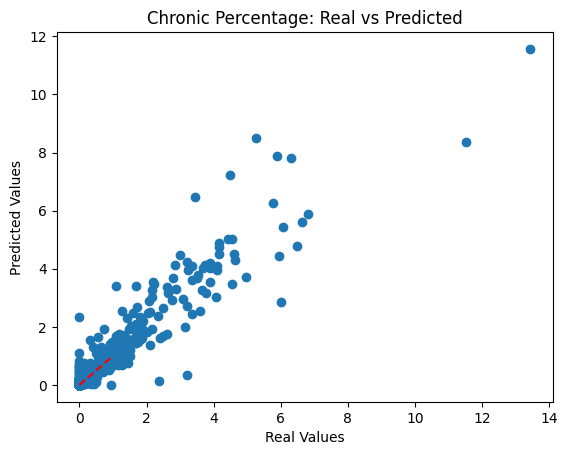

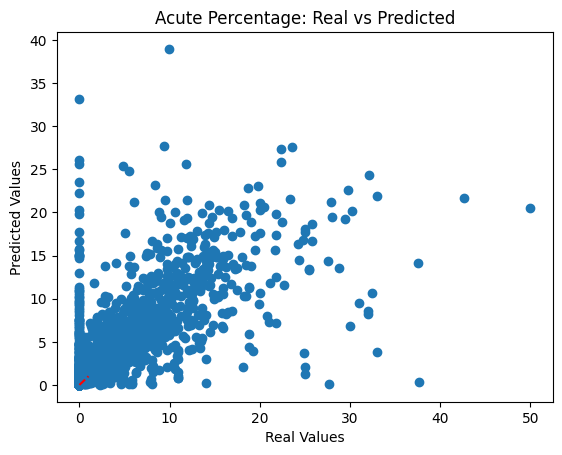

In [17]:
import matplotlib.pyplot as plt

# Chronic_percentage scatterplot
plt.scatter(y_test_chronic, y_pred_chronic)
plt.plot([0, 1], [0, 1], '--', color='red')  # Identity line (y = x)
plt.title('Chronic Percentage: Real vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()

# Acute_percentage scatterplot
plt.scatter(y_test_acute, y_pred_acute)
plt.plot([0, 1], [0, 1], '--', color='red')  # identity line (y = x)
plt.title('Acute Percentage: Real vs Predicted')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.show()


In [20]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# example of trained label encoder
label_encoder_country = LabelEncoder()
label_encoder_country.fit(['Austria', 'Italy', 'France', 'Germany', 'UK'])  

label_encoder_gender = LabelEncoder()
label_encoder_gender.fit(['Male', 'Female'])  

label_encoder_age = LabelEncoder()
label_encoder_age.fit(['0-4', '5-14', '15-19', '20-24', '25-34', '35-44', '45-54', '55-64', '65+'])  

# Function to get the prediction of a model 
def predizione_da_input(gender, age_category, country, year):
    # Encoding user input
    encoded_country = label_encoder_country.transform([country])[0] 
    encoded_gender = label_encoder_gender.transform([gender])[0]  
    encoded_age = label_encoder_age.transform([age_category])[0]  

    # Create a DataFrame for an User 
    X_new = pd.DataFrame({
        'Country': [encoded_country],
        'Time': [year], 
        'Gender': [encoded_gender],
        'Category_age': [encoded_age]
    })
    
    # Predict using model  
    predizione = rf_acute.predict(X_new)
    
    # Get the prediction (percentage)
    return predizione

# Example
gender = 'Male'
age = '0-4'
country = 'Italy'
year = 2024

# Call the function
prediction = predizione_da_input(gender, age, country, year)

# Visualize the prediction
print("The percentage of getting Hepatitis B for the year", year, "for a", gender, "aging", age, "in", country, "is:", prediction)


The percentage of getting Hepatitis B for the year 2024 for a Male aging 0-4 in Italy is: [0.18]
